# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define parameters
a = 1.00
b = 0.50
c = 0.50
d = 2.00

# following odesim.py in Newmann

def f(r,t):
    x = r[0]
    y = r[1]
    fx = a*x - b*x*y
    fy = c*x*y - d*y
    return np.array([fx, fy], float)

In [14]:
# specifications
t0 = 0.0
tf = 30.0
N = 1000
h = (tf - t0)/N

tpoints = np.arange(t0, tf, h)
xpoints = []
ypoints = []

r = np.array([2.0, 2.0], float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

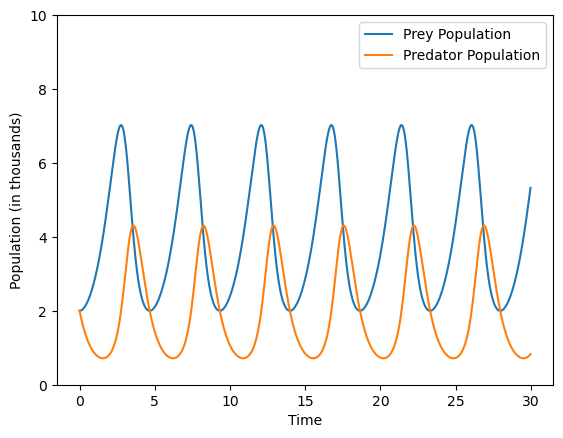

In [19]:
plt.plot(tpoints, xpoints, label="Prey Population")
plt.plot(tpoints, ypoints, label="Predator Population")
plt.ylim(0,10)
plt.xlabel("Time")
plt.ylabel("Population (in thousands)")
plt.legend()
plt.show()

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


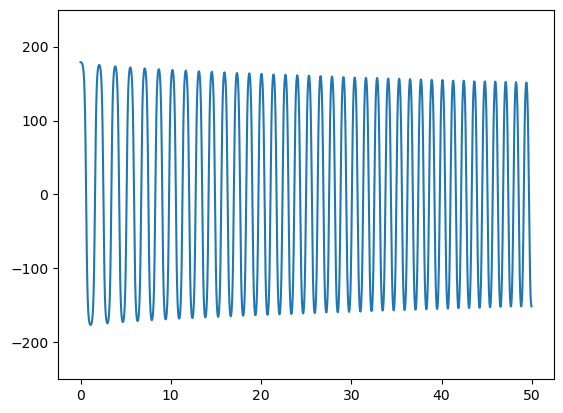

In [36]:
# specify constants
g = 9.81 # in [m/s^2]
l = 0.1 # in [m]

def f(r,t):
    theta = r[0]
    omega = r[1]
    f_theta = omega
    f_omega = -(g/l)*np.sin(theta)
    return np.array([f_theta, f_omega], float)

# solution specifications
t0 = 0
tf = 50
N = 1000
h = (tf-t0)/N

tpoints = np.arange(t0, tf, h)
theta_pts = []
omega_pts = []

r = np.array([179.0*np.pi/180, 0], float)

for t in tpoints:
    theta_pts.append(r[0])
    omega_pts.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

# plot
#plt.plot(tpoints, theta_pts, label=r"$\theta$ (rad)")
plt.plot(tpoints, np.array(theta_pts)*180/np.pi, label=r"$\theta$ ($^{\circ}$)")
#plt.ylim(-4,5)
plt.ylim(-250,250)
plt.show()